# Scikit-Learn Workflow and Project Definition

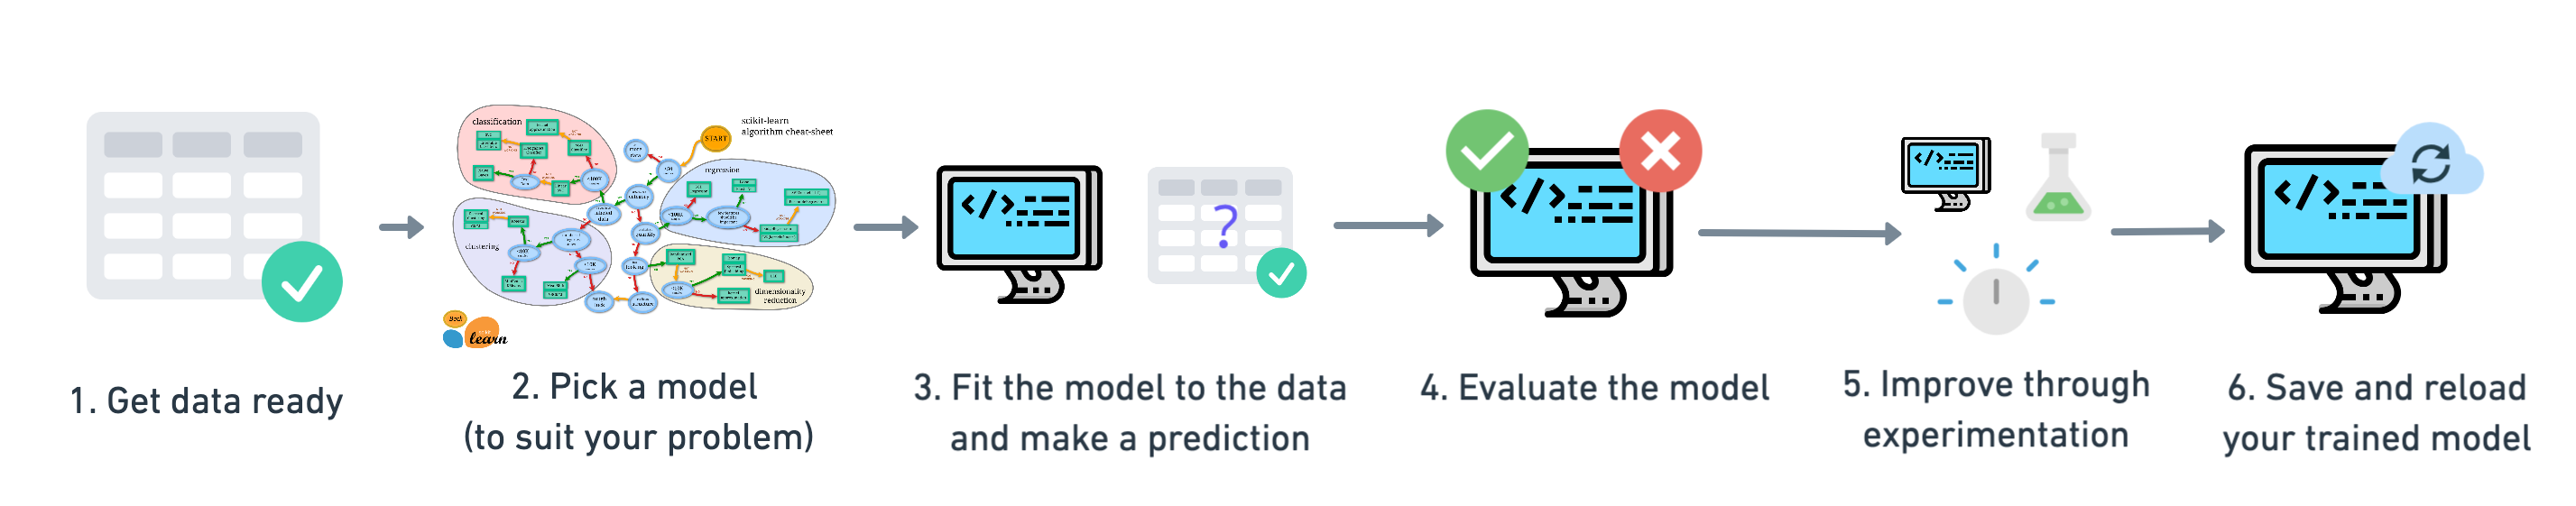

The goal of this project is to train a machine learning model that can identify spam emails using a collection of emails and their spam status.

[Download Dataset](https://drive.google.com/file/d/1theJRtppFpyWizhZJCBDjZLm6feaybzD/view?usp=sharing)

#0.Setting Up the Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1.Getting data ready

##Getting infromation about the data

In [ ]:
email_df = pd.read_csv('/content/drive/MyDrive/datasets/emailDataset/emails.csv')
print(email_df.shape)
email_df.head()

(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
# Remove duplicate rows
email_df = email_df.drop_duplicates()

In [ ]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [ ]:
email_df.describe()

,spam
count,5695.000000
mean,0.240211
std,0.427249
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
print(email_df['spam'].value_counts()/len(email_df)*100)


0    75.978929
1    24.021071
Name: spam, dtype: float64


## Transforming text to number

In [ ]:
#using CountVectorizer to generate numfer from text
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer()
transformed = CountVectorizer.fit_transform(email_df['text'])

In [ ]:
print(CountVectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [ ]:
print(transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
email_df.shape

(5695, 2)

In [ ]:
transformed.shape

(5695, 37303)

# 2.choosing the right algorithm for the problem

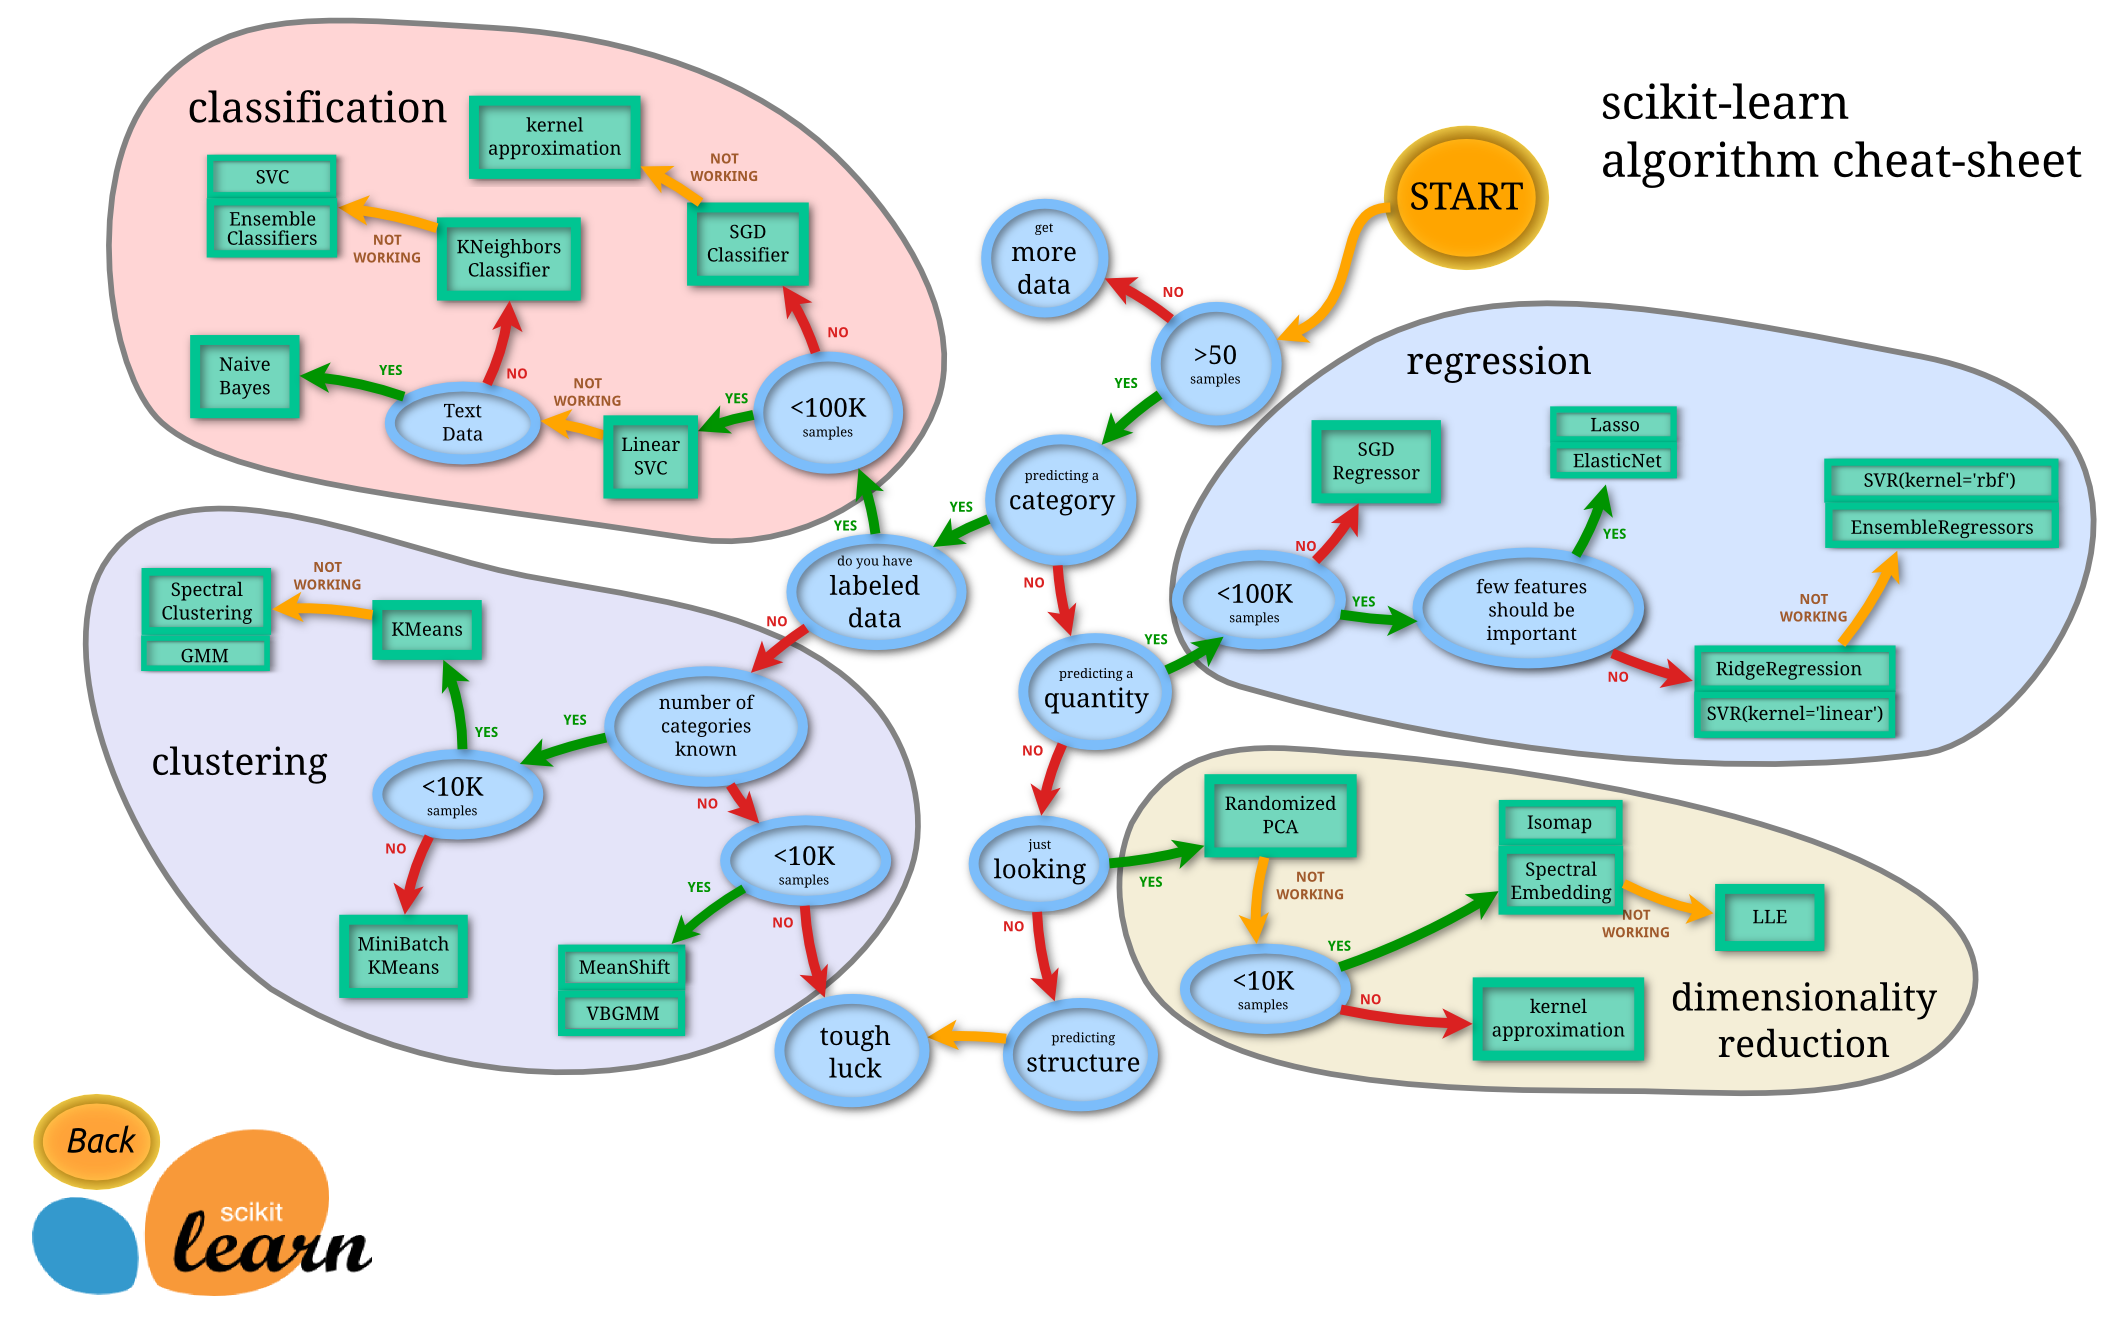

##Sepperating test and train data sets

In [ ]:
email_Y = email_df["spam"].values
#splitting the training and testing samples from the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed, email_Y, test_size = 0.2)

## creating an object of the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(  )

#3. Fitting the data to the model and making prediction

In [ ]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9894644424934153

## Testing with text sample

In [ ]:
test_sampel = ['free modey', 'hi give me your information for the free gift', 'hi we need to check you work with the r b team']
test_sampel_vectorized = CountVectorizer.transform(test_sampel)
print(test_sampel_vectorized.shape)

(3, 37303)


In [ ]:
model.predict(test_sampel_vectorized)

array([1, 1, 0])

In [ ]:
Y_predict = model.predict(X_test)
Y_predict

array([0, 0, 1, ..., 0, 0, 1])

# 4.Evaluating a machine learning model

Model's scores shows good result on both training and testing dataset. Model is not over fitted.

In [ ]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.9958296751536435
0.9894644424934153


## using cross values score

* this method splits the data and do the testing on each block and finally return an array of results

In [ ]:
#importing cross_val_score
from sklearn.model_selection import cross_val_score
score_array = cross_val_score(model, X_test , Y_test , cv = 5)
print(score_array)
print(np.mean(score_array))

[0.96929825 0.92105263 0.96491228 0.98684211 0.96475771]
0.9613725944817991


## Model evaluation metrics

1. Area under ROC curve
2. Confusion matrix
3. Classification report

### Area under the receiver operating characteristic curve (AUC/ROC)
ROC curves are a comparison of a model's true positive rate (TPR) versus a model's false positive rate(FPR)

* True Positive = model predicts 1 when target is 1
* False Positive = model predicts 1 when target is 0
* True Negative  = model predicts 0 when target is 0
* False Negative = model predicts 0 when target is 1

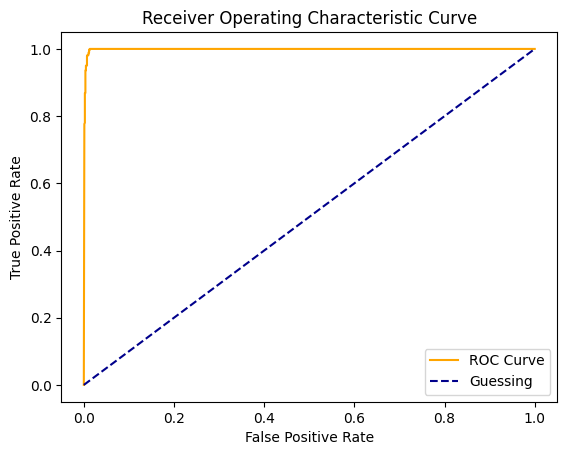

areaunder the curve : 0.9985972839444872


In [ ]:
y_pos_probs = model.predict_proba(X_test)[:,1]
# finding FPR and TPR
from sklearn.metrics import roc_curve
fpr , tpr, thresholds = roc_curve (Y_test , y_pos_probs)
# creating and ploting the curve
def plot_roc_curve(fpr , tpr):
    plt.plot(fpr, tpr, color="orange" , label = "ROC Curve")
    plt.plot([0 , 1], [0 , 1], color = "darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr , tpr)
#finding the area under the curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test , y_pos_probs)
print(f"areaunder the curve : {auc}")

### confusion matrix

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(Y_test, Y_predict)
CM

array([[846,  11],
       [  1, 281]])

### classification report

In [ ]:
# creating a function to ease the evaluation of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluation_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dic = { "accuracy" : round(accuracy, 2) ,
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dic
baseline_metrics = evaluation_preds(Y_test, Y_predict)

Accuracy: 98.95
Precision: 0.96
Recall: 1.00
F1: 0.98


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       857
           1       0.96      1.00      0.98       282

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



#5. Improving the model

##Hyperparameter tuning with GridSearchCV

In [ ]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid = {'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'fit_prior': [True,False]
        }

grid_model = GridSearchCV(estimator = model,
                          param_grid = grid,
                          cv = 5,
                          verbose=-1)
#n_iter=> number of models to try
#cv = cross validation num
#fitting data to new model
grid_model.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'fit_prior': [True, False]},
             verbose=-1)

In [ ]:
grid_model.best_params_

{'alpha': 0.2, 'fit_prior': True}

In [ ]:
#making predictions and analyzing the score
grid_model_preds = grid_model.predict(X_test)
grid_metrics = evaluation_preds(Y_test, grid_model_preds)

Accuracy: 99.12
Precision: 0.97
Recall: 1.00
F1: 0.98


<Axes: >

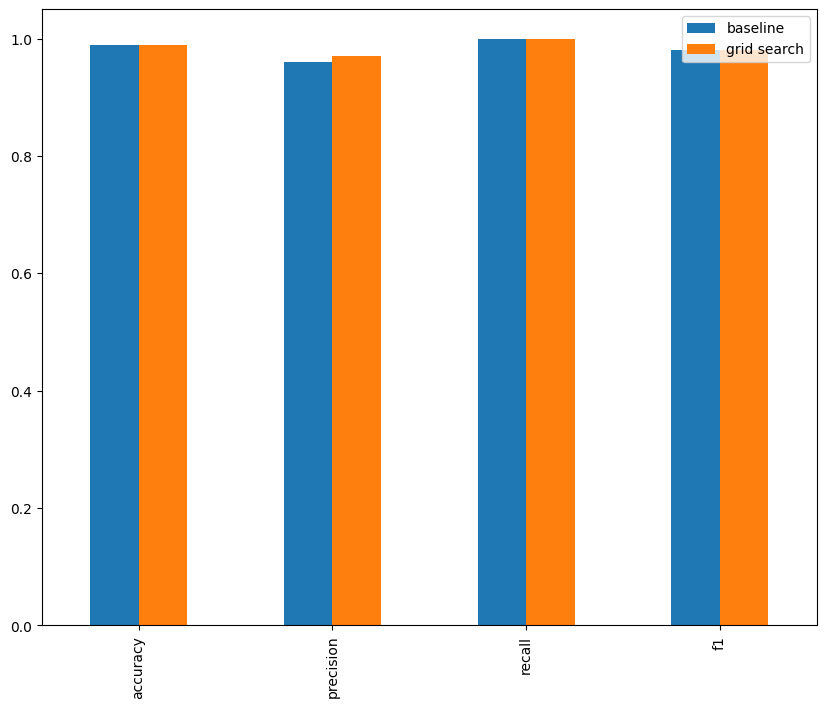

In [ ]:
#plotting the results
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "grid search" : grid_metrics})
compare_metrics.plot.bar(figsize =(10, 8))

Model's precision improved.

# 6.Saving and loading models

In [ ]:
from joblib import dump, load
#saving a model
dump(grid_model, "/content/drive/MyDrive/datasets/emailDataset/best_model.joblib")

['/content/drive/MyDrive/datasets/emailDataset/best_model.joblib']

In [ ]:
#loading the model
loaded_joblib_obj = load(filename = "/content/drive/MyDrive/datasets/emailDataset/best_model.joblib")

In [ ]:
#making predictions and analyzing the score
model_preds = loaded_joblib_obj.predict(X_test)
evaluation_preds(Y_test, model_preds)

Accuracy: 99.12
Precision: 0.97
Recall: 1.00
F1: 0.98


{'accuracy': 0.99, 'precision': 0.97, 'recall': 1.0, 'f1': 0.98}